# **NLP DISASTER TWEETS**: BERT, RoBERTa, EDA,TensorFlow 2.0, Pytorch ,Plotly VISUALIZATION

# Table of Contents

* [Introduction](#section-one)
* [References](#section-ten)
* [BERT Model]( #section-two)
* [Libraries](#section-three)
* [Loading Data](#section-four)
* [Exploratory Data Analysis of Tweets](#section-five)
    - [Show percentage of tweets marked as Disaster tweets](#subsection-1.1)      
    - [sentence length analysis](#subsection-1.2)      
    - [Tweet Word count analysis](#subsection-1.3)      
    - [Tweet stop word analysis](#subsection-1.4)
    - [Tweet Puntuation and space word analysis](#subsection-1.5)      
    - [NGRAMS](#subsection-1.6)
* [Data Cleaning](#section-six)
    - [Remove URL from the tweet](#subsection-2.1)      
    - [Remove # from the text](#subsection-2.2)      
    - [Remove Emoji from the tweet](#subsection-2.3)      
    - [Remove HTML Tags from Tweet](#subsection-2.4)
    - [Remove Punctuations from the Tweet](#subsection-2.5)      
    - [Spell correction in tweets](#subsection-2.6)      
    - [Remove Stopwords from tweets](#subsection-2.7)      
    - [Filling Missing values](#subsection-2.8)
    - [WordCloud Map](#subsection-2.9)
* [Modeling With BERT](#section-seven)
    - [Building BERT Model With PyTorch](#subsection-3.1)      
        - [Tokenization](#subsection-3.1.1)      
        - [Map Tokens](#subsection-3.1.2)      
        - [Create a TensorDataSet](#subsection-3.1.3)
        - [Create Validation Dataset from TrainSet](#subsection-3.1.4)      
        - [Create BERT Data Loader](#subsection-3.1.5)      
        - [LOAD BERT Pretrained Sequence Classification](#subsection-3.1.6)      
        - [Setup AdamW BERT Optimizer](#subsection-3.1.7)      
        - [Create Learning rate scheduler with warmup](#subsection-3.1.8)
    - [Training the BERT Model](#subsection-3.2)      
    - [Validating the BERT Model](#subsection-3.3)      
    - [Check Accuracy](#subsection-3.4) 
    - [Prediction with BERT Model](#subsection-3.5)     
* [RoBERTa model with Tensorflow and HuggingFace](#section-eight)      
    - [Create Tokenizer](#subsection-4.1)      
    - [Map Token](#subsection-4.2)            
    - [Build RoBERTa Model](#subsection-4.3)      
    - [Fit RoBERTa Model](#subsection-4.4)      
    - [Predict Using RoBERTa Model](#subsection-4.5)      
    - [Plot the Prediction from RoBERTa](#subsection-4.6)      
    - [RoBERTa Confusion Matrix](#subsection-4.7)
* [Conclusion](#section-nine)


 <a id="section-one"></a>
 # Introduction

My name is Divya Devadas. I’m currently doing my masters in Data Science. As a part of the course we came across many machine learning/ Data science aspects. I believe the Kaggle is the right place to practice with recent technologies in the area of data science and good place to refer all kinds of  data science related projects. And doing projects here will be definitely an achievement towards our carrier path. In this Kernal i have implemented BERT and RoBERTa model for classification and prediction.

As big data expands into AI and machine learning, its scope is very vast and, for any business data analysis is very important because it helps in decision making as well as provides explanation to important concepts and problems. Also we can find solution of various difficult real life problems. Every day the advantages of Data science is growing exponentially also NLP is a rapid growing field in AI.




<a id="section-ten"></a>
# References
•	https://www.analyticsvidhya.com/blog/2019/09/demystifying-bert-groundbreaking-nlp-framework/

•	https://towardsdatascience.com/natural-language-processing-nlp-top-10-applications-to-know-b2c80bd428cb

•	https://www.researchgate.net/figure/Example-for-tweet-text-preprocessing_fig2_322713146

•	https://www.youtube.com/watch?v=FKlPCK1uFrc

•	https://colab.research.google.com/drive/1pTuQhug6Dhl9XalKB0zUGf4FIdYFlpcX?fbclid=IwAR3k5k56sXpnbTc0z8AxctuigIZ4XhS7Zk0PTOpv6uqlU0WrXepJzssiM88#scrollTo=cKsH2sU0OCQA

•	https://towardsdatascience.com/effectively-pre-processing-the-text-data-part-1-text-cleaning-9ecae119cb3e

•	https://blog.camelot-group.com/2019/03/exploratory-data-analysis-an-important-step-in-data-science/

•	https://huggingface.co/transformers/main_classes/tokenizer.html

•	https://huggingface.co/transformers/main_classes/optimizer_schedules.html

•	https://huggingface.co/transformers/model_doc/roberta.html?fbclid=IwAR0q4NiE-b1C8v4-Eusq6QhL3heYpfZa4XJXfpy0rlZkrqn819JNE-g78h4

•	https://analyticsindiamag.com/bert-classifier-with-tensorflow-2-0/

•	https://www.kaggle.com/maroberti/fastai-with-transformers-bert-roberta/notebook

•	https://medium.com/analytics-vidhya/bert-in-keras-tensorflow-2-0-using-tfhub-huggingface-81c08c5f81d8

•	https://www.infoq.com/news/2019/09/facebook-roberta-nlp/


 <a id="section-two"></a>
 # BERT Model
 
## Implemented BERT model to do tokenization, classification and prediction with using transformers. 
 
Bidirectional Encoder Representations from Transformers is a technique for NLP pre-training developed by Google. BERT was created and published in 2018 by Jacob Devlin and his colleagues from Google. Google is leveraging BERT to better understand user searches. [Wikipedia](http://).
BERT is a “deeply bidirectional” model. Bidirectional means that BERT learns information from both the left and the right side of a token’s context during the training phase.
The bidirectionality of a model is important for truly understanding the meaning of a language.


 <a id="section-three"></a>
# Libraries

In [ ]:
#!pip install pyspellchecker

In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # Library for string operations

import os

# plotly library
import plotly
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.figure_factory as ff

import matplotlib.pyplot as plt #Another plotting libraray

# word cloud library
from wordcloud import WordCloud

#Regex library
import re

#Spell Checker
#from spellchecker import SpellChecker 
#spell = SpellChecker()

<a id="section-four"></a>
# Loading Data

In [30]:
TrainDataSet= pd.read_csv('../input/nlp-getting-started/train.csv')
TestDataSet=pd.read_csv('../input/nlp-getting-started/test.csv')
TrainDataSet.head(3)



,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


<a id="section-five"></a>
# Exploratory Data Analysis of Tweets

<a id="subsection-1.1"></a>
### ***Show percentage of tweets marked as Disaster tweets** 

In [31]:
Grouped_Disaster = TrainDataSet.groupby(['target'])['id'].count().reset_index()
labels = ['Disaster','Non-Disaster']


# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=Grouped_Disaster['id'], hole=.4)])
fig.update_layout(height=400,title_x=0.5,width=400, title_text='Disaster Tweet Percentage',
                 annotations=[dict(text='#tweet', x=0.5, y=0.5, font_size=20, showarrow=False)])

plotly.offline.iplot(fig)

<a id="subsection-1.2"></a>
### ***sentence length analysis**
Loook at the number of characters present in each tweet. This can give us a idea about tweet length in our dataset.

In [32]:
TrainDataSet['tweetlength'] = TrainDataSet['text'].apply(lambda x:  len(str(x)))
TrainDataSet.head(5)

,id,keyword,location,text,target,tweetlength
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [33]:
Top_20_Lengthy_Tweets = TrainDataSet.sort_values('tweetlength',ascending=False)[:20][::-1]
Bottom_20_Lengthy_Tweets = TrainDataSet.sort_values('tweetlength',ascending=True)[:20][::-1]
Tweetlength_Data =TrainDataSet['tweetlength'].describe()


fig = make_subplots(
    rows=3, cols=4,
    specs=[[None,{"type": "indicator"},{"type": "indicator"},{"type": "indicator"}],
           [{"type": "bar" ,"colspan": 2},None, {"type": "bar" ,"colspan": 2},None],
           [{"type": "bar","colspan": 4}, None,None,None]],
    subplot_titles=("","","","Top 20 Tweets by length","Bottom 20 Tweet by length")
)

fig.add_trace(
    go.Indicator(
        mode="number",
        value=Tweetlength_Data[1],
        title="Mean Tweet Length",
    ),
    row=1, col=2
)

fig.add_trace(
    go.Indicator(
        mode="number",
        value=Tweetlength_Data[3],
        title="Min Tweet Length",
    ),
    row=1, col=3
)

fig.add_trace(
    go.Indicator(
        mode="number",
        value=Tweetlength_Data[7],
        title="Max Tweet Length",
    ),
    row=1, col=4
)


fig.add_trace(go.Bar(name='id',text='id', x=list(range(len(Top_20_Lengthy_Tweets))), y=Top_20_Lengthy_Tweets['tweetlength']),
              row=2, col=1)


fig.add_trace(go.Bar(name='id',text='id', x=list(range(len(Bottom_20_Lengthy_Tweets))), y=Bottom_20_Lengthy_Tweets['tweetlength']),
              row=2, col=3)
fig.add_trace(go.Bar(name='id',text='id',  x=list(range(len(TrainDataSet.head(500)))), y=TrainDataSet['tweetlength']),
              row=3, col=1)

fig.update_layout(height=650,width=800,title_x=0.5,title_text="Tweets Length Analysis", showlegend=False)

plotly.offline.iplot(fig)


# x=list(range(len(TrainDataSet)))

<a id="subsection-1.3"></a>
### ***Tweet Word count analysis**
Loook at the number of words present in each tweet. This can give us a idea about tweet word count in our dataset.

In [34]:
TrainDataSet['wordcount'] = TrainDataSet['text'].apply(lambda x:  len(str(x).split()))
TrainDataSet.head(5)

,id,keyword,location,text,target,tweetlength,wordcount
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16


In [35]:
Top_20_Lengthy_Tweets = TrainDataSet.sort_values('wordcount',ascending=False)[:20][::-1]
Bottom_20_Lengthy_Tweets = TrainDataSet.sort_values('wordcount',ascending=True)[:20][::-1]
Wordlength_Data =TrainDataSet['wordcount'].describe()


fig = make_subplots(
    rows=3, cols=4,
    specs=[[None,{"type": "indicator"},{"type": "indicator"},{"type": "indicator"}],
           [{"type": "bar" ,"colspan": 2},None, {"type": "bar" ,"colspan": 2},None],
           [{"type": "bar","colspan": 4}, None,None,None]],
    subplot_titles=("","","","Top 20 Tweets word count","Bottom 20 Tweet by word count")
)

fig.add_trace(
    go.Indicator(
        mode="number",
        value=Wordlength_Data[1],
        title="Mean Tweet word count",
    ),
    row=1, col=2
)

fig.add_trace(
    go.Indicator(
        mode="number",
        value=Wordlength_Data[3],
        title="Min Tweet word count",
    ),
    row=1, col=3
)

fig.add_trace(
    go.Indicator(
        mode="number",
        value=Wordlength_Data[7],
        title="Max Tweet word count",
    ),
    row=1, col=4
)


fig.add_trace(go.Bar(name='id',text='id', x=Top_20_Lengthy_Tweets['keyword'], y=Top_20_Lengthy_Tweets['wordcount']),
              row=2, col=1)


fig.add_trace(go.Bar(name='id',text='id', x=Bottom_20_Lengthy_Tweets['keyword'], y=Bottom_20_Lengthy_Tweets['wordcount']),
              row=2, col=3)
fig.add_trace(go.Bar(name='id',text='id', x=TrainDataSet['keyword'], y=TrainDataSet['wordcount']),
              row=3, col=1)

fig.update_layout(height=600,width=800,title_x=0.5, title_text="Tweets Word Count Analysis", showlegend=False)

plotly.offline.iplot(fig)


<a id="subsection-1.4"></a>
### * **Tweet stop word analysis**
Loook at the number of stop words present in each tweet. This can give us a idea about stop word usage in tweet.Stopwords are most commonly used in any language such as “the”,” a”,” an” etc. nltk library help us to find commonly used stopwords. Nltk contains stopwords for many languages so need to filter the English stopwords from the collection.

In [36]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

wordcollection=[]
TempTextCol= TrainDataSet['text'].str.split()
TempTextCol=TempTextCol.values.tolist()
wordcollection=[word for i in TempTextCol for word in i]

from collections import defaultdict
stopwprddic=defaultdict(int)
for word in wordcollection:
    if word in stop:
        stopwprddic[word]+=1

stopwprddf =  pd.DataFrame(stopwprddic.items(), columns=['word', 'count'])

stopwprddf.head()

,word,count
0,are,345
1,the,2575
2,of,1722
3,this,335
4,all,178


In [37]:
Top_20_Lengthy_Tweets = stopwprddf.sort_values('count',ascending=False)[:20][::-1]
Bottom_20_Lengthy_Tweets = stopwprddf.sort_values('count',ascending=True)[:20][::-1]
Wordlength_Data =stopwprddf['count'].describe()


fig = make_subplots(
    rows=3, cols=4,
    specs=[[None,{"type": "indicator"},{"type": "indicator"},{"type": "indicator"}],
           [{"type": "bar" ,"colspan": 2},None, {"type": "bar" ,"colspan": 2},None],
           [{"type": "bar","colspan": 4}, None,None,None]],
    subplot_titles=("","","","Top 20 Tweets stopword count","Bottom 20 Tweet by stopword count")
)

fig.add_trace(
    go.Indicator(
        mode="number",
        value=Wordlength_Data[1],
        title="Mean stopwords",
    ),
    row=1, col=2
)

fig.add_trace(
    go.Indicator(
        mode="number",
        value=Wordlength_Data[3],
        title="Min stopwords",
    ),
    row=1, col=3
)

fig.add_trace(
    go.Indicator(
        mode="number",
        value=Wordlength_Data[7],
        title="Max Tweet stopwords",
    ),
    row=1, col=4
)


fig.add_trace(go.Bar(name='count',text='count', x=Top_20_Lengthy_Tweets['word'], y=Top_20_Lengthy_Tweets['count']),
              row=2, col=1)


fig.add_trace(go.Bar(name='count',text='count', x=Bottom_20_Lengthy_Tweets['word'], y=Bottom_20_Lengthy_Tweets['count']),
              row=2, col=3)
fig.add_trace(go.Bar(name='count',text='count', x=stopwprddf['word'], y=stopwprddf['count']),
              row=3, col=1)

fig.update_layout(height=500,width=800,title_text="Tweets StopWord Analysis", title_x=0.5, showlegend=False)

plotly.offline.iplot(fig)


<a id="subsection-1.5"></a>
### * **Tweet Puntuation and space word analysis**
Loook at the number of Puntuation/space words present in each tweet. This can give us a idea about Puntuation/space usage in tweet.Punctuations and space words also commonly used in any language. **spacy** library help us to find commonly used Puntuation/space words.

In [11]:
import spacy
nlp = spacy.load('en')

from collections import defaultdict
dicspy=defaultdict(int)


docs = TrainDataSet['text'].tolist()

def token_filter(token):
    return (token.is_punct | token.is_space )

filtered_tokens = []
for doc in nlp.pipe(docs):
    tokens = [token.lemma_ for token in doc if token_filter(token)]
    filtered_tokens.append(tokens)
    for tk in tokens:
        dicspy[tk]+=1

Punctuationdf =  pd.DataFrame(dicspy.items(), columns=['word', 'count'])

Punctuationdf.head()

,word,count
0,#,3362
1,.,2914
2,',1292
3,-,1399
4,",",1


In [12]:
Top_20_Lengthy_Tweets = Punctuationdf.sort_values('count',ascending=False)[:20][::-1]
Bottom_20_Lengthy_Tweets = Punctuationdf.sort_values('count',ascending=True)[:20][::-1]
Wordlength_Data =Punctuationdf['count'].describe()


fig = make_subplots(
    rows=3, cols=4,
    specs=[[None,{"type": "indicator"},{"type": "indicator"},{"type": "indicator"}],
           [{"type": "bar" ,"colspan": 2},None, {"type": "bar" ,"colspan": 2},None],
           [{"type": "bar","colspan": 4}, None,None,None]],
    subplot_titles=("","","","Top 20 Tweets Puntuation or Space count","Bottom 20 Tweet by Puntuation or Space count")
)

fig.add_trace(
    go.Indicator(
        mode="number",
        value=Wordlength_Data[1],
        title="Mean ",
    ),
    row=1, col=2
)

fig.add_trace(
    go.Indicator(
        mode="number",
        value=Wordlength_Data[3],
        title="Min",
    ),
    row=1, col=3
)

fig.add_trace(
    go.Indicator(
        mode="number",
        value=Wordlength_Data[7],
        title="Max",
    ),
    row=1, col=4
)


fig.add_trace(go.Bar(name='count',text='count', x=Top_20_Lengthy_Tweets['word'], y=Top_20_Lengthy_Tweets['count']),
              row=2, col=1)


fig.add_trace(go.Bar(name='count',text='count', x=Bottom_20_Lengthy_Tweets['word'], y=Bottom_20_Lengthy_Tweets['count']),
              row=2, col=3)
fig.add_trace(go.Bar(name='count',text='count', x=Punctuationdf['word'], y=Punctuationdf['count']),
              row=3, col=1)

fig.update_layout(height=500,width=800,title_text="Tweets Punctuation and Space Analysis", title_x=0.5, showlegend=False)

plotly.offline.iplot(fig)


In [13]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
def getNgram(wordCollection, n=None):
    vectorData = CountVectorizer(ngram_range=(n, n)).fit(wordCollection)
    BagOfWords = vectorData.transform(wordCollection)
    SumWords = BagOfWords.sum(axis=0) 
    WordsFq = [(word, SumWords[0, idx]) 
                  for word, idx in vectorData.vocabulary_.items()]
    WordsFq =sorted(WordsFq, key = lambda x: x[1], reverse=True)
    return WordsFq[:10]

getBigrams=getNgram(TrainDataSet['text'],2)[:10]
x,y=map(list,zip(*getBigrams))

import plotly.express as px
fig = px.bar(x=y,y=x)
fig.update_layout(height=500,width=600,title_text="Ngram Analysis", title_x=0.5, showlegend=False)
plotly.offline.iplot(fig)


In [14]:
triGrams=getNgram(TrainDataSet['text'],n=3)
x,y=map(list,zip(*triGrams))
fig = px.bar(x=y,y=x)
fig.update_layout(height=500,width=600,title_text="TriGram Analysis", title_x=0.5, showlegend=False)
plotly.offline.iplot(fig)

<a id="section-six"></a>
# Data Cleaning

We need to clean the data to avoid errors and incorrect results

### Data Cleaning Tasks


Remove Url

Remove # from the text

Remove emoji's

Remove HTML Tags

Remove Punctuations

spell corrections

Remove stopwords 



In [4]:
TrainDataSet['text'] = TrainDataSet['text'].apply(lambda x: re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', str(x)))
TestDataSet['text'] = TestDataSet['text'].apply(lambda x: re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', str(x)))
TrainDataSet.head(3)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


<a id="subsection-2.1"></a>
### ***Remove URL from the tweet**
URL'S some error during processing so we are using regex library to remove the urls

In [5]:

TrainDataSet['text'] = TrainDataSet['text'].apply(lambda x: re.sub(r'#', '', str(x)))
TestDataSet['text'] = TestDataSet['text'].apply(lambda x: re.sub(r'#', '', str(x)))
TrainDataSet.head(3)



,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake Ma...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


<a id="subsection-2.2"></a>
### ***Remove # from the text**

In [6]:

TrainDataSet['text'] = TrainDataSet['text'].apply(lambda x: re.sub(r'#', '', str(x)))
TestDataSet['text'] = TestDataSet['text'].apply(lambda x: re.sub(r'#', '', str(x)))
TrainDataSet.head(3)



,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake Ma...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


* **Remove Emoji from the tweet**
we need to remove emoji from the tweet since people are using lot of emojies in there tweet to express emotions. We need to create function so we can specify different emoji patterns with range of unicode characters, the list is not complete but good for now.

In [7]:
def EmojiCleanser(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [8]:
TestDataSet['text'] = TestDataSet['text'].apply(lambda x: EmojiCleanser(str(x)))
TrainDataSet['text'] = TrainDataSet['text'].apply(lambda x: EmojiCleanser(str(x)))
TrainDataSet.tail(3)

,id,keyword,location,text,target
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii.,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


<a id="subsection-2.4"></a>
### ***Remove HTML Tags from Tweet**

we need to remove html tags so we can avoid creating unncessary tokens. we can use a regex expression to remove those tags.

In [9]:
TestDataSet['text'] = TestDataSet['text'].apply(lambda x: re.sub(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});', '', str(x)))
TrainDataSet['text'] = TrainDataSet['text'].apply(lambda x: re.sub(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});', '', str(x)))
TrainDataSet.tail(3)

,id,keyword,location,text,target
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii.,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


<a id="subsection-2.5"></a>
### ***Remove Punctuations from the Tweet**
we need to remove the puntuations from tweet so we are using string libraray to remove the punctuations

In [10]:
TestDataSet['text'] = TestDataSet['text'].apply(lambda x: str(x).translate(str.maketrans('','',string.punctuation)))
TrainDataSet['text'] = TrainDataSet['text'].apply(lambda x: str(x).translate(str.maketrans('','',string.punctuation)))
TrainDataSet.tail(3)


,id,keyword,location,text,target
7610,10871,NaN,NaN,M194 0104 UTC5km S of Volcano Hawaii,1
7611,10872,NaN,NaN,Police investigating after an ebike collided w...,1
7612,10873,NaN,NaN,The Latest More Homes Razed by Northern Califo...,1


<a id="subsection-2.6"></a>
### *** Spell correction in tweets**
We need to correct the spelling in tweets so we will get more accurate tokens. We can use SpellChecker in pyspellchecker library.

In [ ]:
#TestDataSet['text'] = TestDataSet['text'].apply(lambda x: " ".join([spell.correction(i) for i in str(x).split()]))
#TrainDataSet['text'] = TrainDataSet['text'].apply(lambda x: " ".join([spell.correction(i) for i in str(x).split()]))
#TrainDataSet.tail(3)


<a id="subsection-2.7"></a>
### * **Remove Stopwords from tweets**
We need to remove Stopwords in tweets so we will get more accurate tokens. We can use stopwords in nltk library.

In [11]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

def StopWordCleanser(word):
    if word in stop:
        return ""
    else:
        return word


TestDataSet['text'] = TestDataSet['text'].apply(lambda x: " ".join([StopWordCleanser(i) for i in str(x).split()]))
TrainDataSet['text'] = TrainDataSet['text'].apply(lambda x: " ".join([StopWordCleanser(i) for i in str(x).split()]))



In [ ]:
TrainDataSet.head(20)

In [23]:

TrainDataSet = TrainDataSet[TrainDataSet.keyword.notnull()]
TrainDataSet = TrainDataSet[TrainDataSet.location.notnull()]


Grouped_Disaster = TrainDataSet.groupby(['keyword'])['id'].count().reset_index()
Grouped_Location = TrainDataSet.groupby(['location'])['id'].count().reset_index()

Grouped_Disaster = Grouped_Disaster.query('keyword !="Not Identified"' )
Grouped_Location = Grouped_Location.query('location !="Not Location"' )

Group_Disaster_filter = Grouped_Disaster.sort_values('id',ascending=False)[:20][::-1]
Grouped_Location_filter = Grouped_Location.sort_values('id',ascending=False)[:20][::-1]

fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "bar"}, {"type": "bar"}]],
    subplot_titles=("Top 20 Disaster by Tweets","Top 20 Tweet Location")
)

fig.add_trace(go.Bar(name='id',text='id', x=Group_Disaster_filter['keyword'], y=Group_Disaster_filter['id']),
              row=1, col=1)


fig.add_trace(go.Bar(name='id',text='id', x=Grouped_Location_filter['location'], y=Grouped_Location_filter['id']),
              row=1, col=2)

fig.update_layout(height=500,width=600,title_text="Tweets Breakdown", title_x=0.5, showlegend=False)
plotly.offline.iplot(fig)



<a id="subsection-2.9"></a>
## WordCloud Map

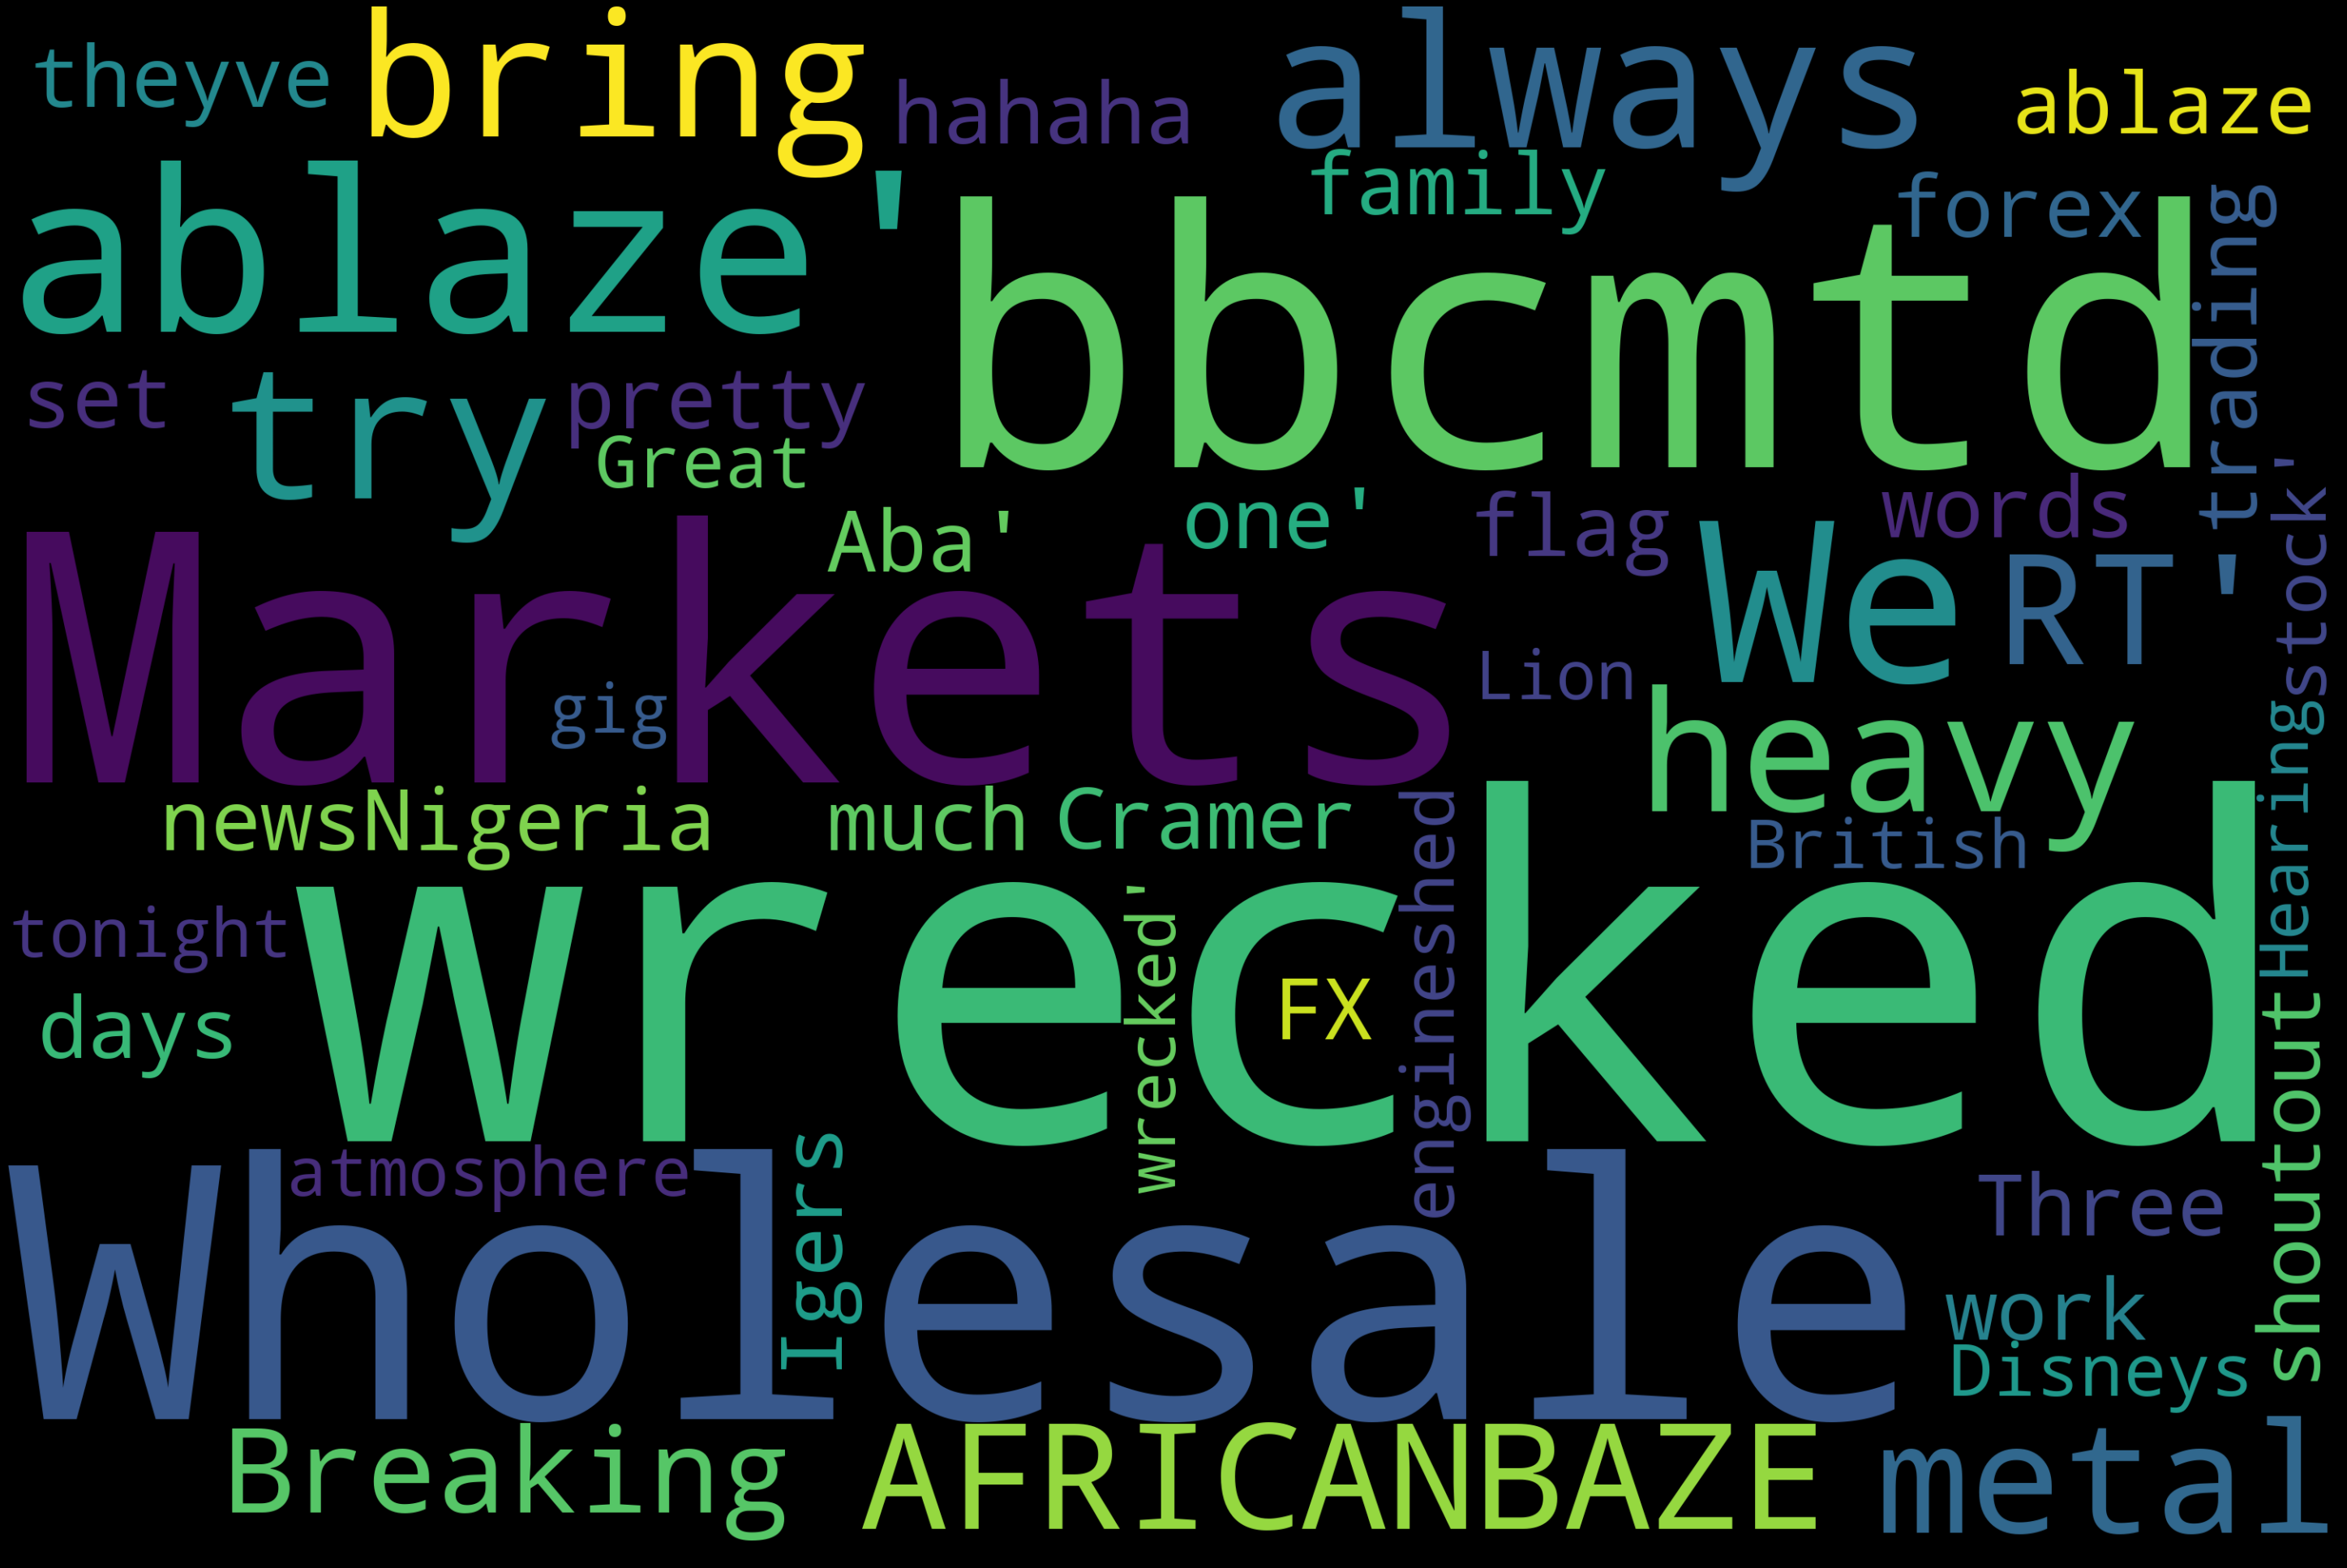

In [24]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = TrainDataSet.text.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

 <a id="section-seven"></a>
# Modeling With BERT

Bidirectional Encoder Representations from Transformers is a technique for NLP pre-training developed by Google. BERT was created and published in 2018 by Jacob Devlin and his colleagues from Google.

BERT is a model with absolute position embeddings.

BERT is trained with a masked language modeling (MLM) objective (Efficient at predicting masked tokens and at NLU in general, but is not optimal for text generation). Models trained with a causal language modeling (CLM) objective are better in that regard.

BERT is trained using a next sentence prediction (NSP) objective using the [CLS] token as a sequence approximate.


![](https://miro.medium.com/max/1750/0*XSr4xRO5nhVpjuos.png)

[Image source](https://towardsdatascience.com/a-review-of-bert-based-models-4ffdc0f15d58)

## Available Frame works (TensorFlow - Pytorch - Keras)

* **Tensorflow** Created by Google, Version 2.3 avaialble now https://www.tensorflow.org/api_docs/python/tf.


* **PyTorch** Created by Facebook , Version 1.6 availabe https://pytorch.org/


* **Keras** (https://keras.io/)High level API to simplify the complexity of deep learning frameworks.Runs on top of other deep learning APIs — TensorFlow, Theano and CNTK


<a id="subsection-3.1"></a>
## BERT - Building Model With PyTorch and HuggingFace
Ref : https://huggingface.co/transformers/model_doc/bert.html 

In [12]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, BertConfig, get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, random_split, DataLoader, RandomSampler, SequentialSampler


wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [13]:
# If there's a GPU available...

if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.  
    
    device = torch.device('cuda')    


    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device('cpu')

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


<a id="subsection-3.1.1"></a>
### * **Tokenization**

BERT expect data as token so our first step is to tokenize the data

In [14]:
DisastweetTokenizer = BertTokenizer.from_pretrained('bert-large-uncased', do_lower_case=True)
Disastweets = pd.concat([TrainDataSet, TestDataSet])
Disastweets = Disastweets.text.values

print('Tokenized: ', DisastweetTokenizer.tokenize(Disastweets[0]))
print('Token IDs: ', DisastweetTokenizer.convert_tokens_to_ids(DisastweetTokenizer.tokenize(Disastweets[0])))


Tokenized:  ['our', 'deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'us']
Token IDs:  [2256, 15616, 3114, 8372, 2089, 16455, 9641, 2149]


<a id="subsection-3.1.2"></a>
### * **MAP Tokens**

![](http://www.mccormickml.com/assets/BERT/CLS_token_500x606.png)

[Image Source](http://www.mccormickml.com/assets/BERT/CLS_token_500x606.png)

In [15]:
def MapTokens(tweet,labs='None'):
    
    """A function for tokenize all of the sentences and map the tokens to their word IDs."""
    
    global labels
    
    Tokenids = []
    Textmasks = []

    # For every sentence...
    
    for text in tweet:
        #   "encode_plus" will:
        
        #   (1) Tokenize the sentence.
        #   (2) Prepend the `[CLS]` token to the start.
        #   (3) Append the `[SEP]` token to the end.
        #   (4) Map tokens to their IDs.
        #   (5) Pad or truncate the sentence to `max_length`
        #   (6) Create attention masks for [PAD] tokens.
        
        encoded_dict = DisastweetTokenizer.encode_plus(
                            text,                      # Sentence to encode.
                            add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                            truncation='longest_first', # Activate and control truncation
                            max_length = 84,           # Max length according to our text data.
                            pad_to_max_length = True, # Pad & truncate all sentences.
                            return_attention_mask = True,   # Construct attn. masks.
                            return_tensors = 'pt',     # Return pytorch tensors.
                       )

        # Add the encoded sentence to the id list. 
        
        Tokenids.append(encoded_dict['input_ids'])

        # And its attention mask (simply differentiates padding from non-padding).
        
        Textmasks.append(encoded_dict['attention_mask'])

    # Convert the lists into tensors.
    
    Tokenids = torch.cat(Tokenids, dim=0)
    Textmasks = torch.cat(Textmasks, dim=0)
    if labs != 'None': 
        labels = torch.tensor(labs)
    
    return Tokenids,Textmasks,labels
        



In [16]:
Train_Tokenids, Train_Masks, Train_Labels = MapTokens(TrainDataSet['text'].values, TrainDataSet['target'].values)
Test_Tokenids, Test_Masks,Test_Labels = MapTokens(TestDataSet['text'].values)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



<a id="subsection-3.1.3"></a>
### * **Create a TensorDataSet**

In [17]:
TweetTensorDataset = TensorDataset(Train_Tokenids, Train_Masks, Train_Labels)
Predict_TweetTensorDataset = TensorDataset(Test_Tokenids, Test_Masks)

<a id="subsection-3.1.4"></a>
### * **Create Validation Dataset from TrainSet**

In [18]:
Train_TweetTensorDataset, Validation_TweetTensorDataset = random_split(TweetTensorDataset, [int(0.8 * len(TweetTensorDataset)), (len(TweetTensorDataset) - (int(0.8 * len(TweetTensorDataset))))])

<a id="subsection-3.1.5"></a>
### ***Create BERT Data Loader**

In [19]:
batch_size = 32
# Train
BERT_Train_Loader = DataLoader(
            TweetTensorDataset,  # Train Data.
            sampler = RandomSampler(TweetTensorDataset), # Random Batch
            batch_size = batch_size 
        )

# validation

BERT_Validation_Loader = DataLoader(
            Validation_TweetTensorDataset, # Validation Data.
            sampler = SequentialSampler(Validation_TweetTensorDataset), # Sequential Batch.
            batch_size = batch_size # Evaluate with this batch size.
        )

# Prediction.

BERT_Predict_Loader = DataLoader(
            Predict_TweetTensorDataset, # Prediction Data.
            sampler = SequentialSampler(Predict_TweetTensorDataset), # Sequential Batch.
            batch_size = batch_size 
        )


<a id="subsection-3.1.6"></a>
### ***BERT -LOAD Pretrained Sequence Classification**

In [20]:
model = BertForSequenceClassification.from_pretrained(
    'bert-large-uncased', 
    num_labels = 2, # binary classification   
    output_attentions = False,
    output_hidden_states = False, 
)

# Tell pytorch to run this model.

model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 1024, padding_idx=0)
      (position_embeddings): Embedding(512, 1024)
      (token_type_embeddings): Embedding(2, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm): LayerNorm((1024,), eps=1

<a id="subsection-3.1.7"></a>
### ***Setup AdamW BERT Optimizer**
Refrenec https://huggingface.co/transformers/main_classes/optimizer_schedules.html

In [21]:
BERT_Tweet_Optimizer = AdamW(model.parameters(),
                  lr = 6e-6, # args.learning_rate
                  eps = 1e-8 # args.adam_epsilon
                )

<a id="subsection-3.1.8"></a>
### ***Create Learning rate scheduler with warmup**

Warm up steps is a parameter which is used to lower the learning rate in order to reduce the impact of deviating the model from learning on sudden new data set exposure.By default, number of warm up steps is 0.

Training steps is number of batches * number of epochs, but not just number of epochs. So, basically num_training_steps = N_EPOCHS+1 is not correct, unless your batch_size is equal to the training set size.


In [22]:
# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 4

Linear_Scheduler = get_linear_schedule_with_warmup(BERT_Tweet_Optimizer, 
                                            num_warmup_steps = 0, #The number of steps for the warmup phase
                                            num_training_steps = len(BERT_Train_Loader) * epochs) # The index of the last epoch when resuming training



<a id="subsection-3.2"></a>
## **BERT - Train the Model**

In [23]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [24]:
# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []
BERT_train_predictions = []
BERT_true_labels = []
# Measure the total training time for the whole run.
total_t0 = time.time()

print("Training Started")

for epoch_i in range(0, epochs):
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('...')
    
     
    t0 = time.time() # Measure how long the training epoch takes.
    total_train_loss = 0     # Reset the total loss for this epoch.
    
    model.train() # Set the mode and iterate using the dataloader
    
    for step, batch in enumerate(BERT_Train_Loader):
        
        # Progress update every 50 batches.
        if step % 50 == 0 and not step == 0:
            
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(BERT_Train_Loader), elapsed))

        # Read three pytorch tensors (input ids, attention masks, labels) in each Batch Step
        b_input_ids = batch[0].to(device).to(torch.int64)
        b_input_mask = batch[1].to(device).to(torch.int64)
        b_labels = batch[2].to(device).to(torch.int64)
        
        model.zero_grad()# Clear any previously calculated gradients        
        # Evaluate the model on this training batch
          
        loss, logits = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)
               
        total_train_loss += loss.item() # Accumulate the training loss  
        
        loss.backward()# Perform a backward pass to calculate the gradients.
        
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0) # Clip the norm of the gradients to 1.0 -'exploding gradients' problem.
        
        BERT_Tweet_Optimizer.step() # Move to Next Step
        
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        BERT_train_predictions.append(logits)
        BERT_true_labels.append(label_ids)
        Linear_Scheduler.step()

    # Calculate the average loss over all of the batches.
    
        # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(BERT_Train_Loader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
      
    
    print(avg_train_loss)
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
        }
    )
        
print('')
print('Training complete!')   

Training Started

======== Epoch 1 / 4 ========
...
  Batch    50  of    238.    Elapsed: 0:00:44.
  Batch   100  of    238.    Elapsed: 0:01:26.
  Batch   150  of    238.    Elapsed: 0:02:09.
  Batch   200  of    238.    Elapsed: 0:02:52.

  Average training loss: 0.55
  Training epcoh took: 0:03:24
0.5540876550083401

======== Epoch 2 / 4 ========
...
  Batch    50  of    238.    Elapsed: 0:00:43.
  Batch   100  of    238.    Elapsed: 0:01:25.
  Batch   150  of    238.    Elapsed: 0:02:08.
  Batch   200  of    238.    Elapsed: 0:02:51.

  Average training loss: 0.41
  Training epcoh took: 0:03:24
0.40635592922443103

======== Epoch 3 / 4 ========
...
  Batch    50  of    238.    Elapsed: 0:00:43.
  Batch   100  of    238.    Elapsed: 0:01:25.
  Batch   150  of    238.    Elapsed: 0:02:08.
  Batch   200  of    238.    Elapsed: 0:02:51.

  Average training loss: 0.36
  Training epcoh took: 0:03:23
0.3625709851499365

======== Epoch 4 / 4 ========
...
  Batch    50  of    238.    Elapse

In [39]:
from sklearn.metrics import f1_score, accuracy_score
def flat_accuracy(preds, labels):
    
    """A function for calculating accuracy scores"""
    
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    
    return accuracy_score(labels_flat, pred_flat)

def flat_f1(preds, labels):
    
    """A function for calculating f1 scores"""
    
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    
    return f1_score(labels_flat, pred_flat)


<a id="subsection-3.3"></a>
## BERT -Validate the Model

In [40]:
validation_stats = []

predictions = []
true_labels = []
print('')
print('Start Validation...')

# Measure the total training time for the whole run.
total_t0 = time.time()

for epoch_i in range(0, 4):
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print("")
    t0 = time.time() # Measure how long the training epoch takes.
    total_train_loss = 0     # Reset the total loss for this epoch.
    
    model.eval() # Set evaluation mode
    
    # Tracking variables:
    total_eval_accuracy = 0
    total_eval_loss = 0
    total_eval_f1 = 0
    nb_eval_steps = 0
    
    for batch in BERT_Validation_Loader:
        # Calculate elapsed time in minutes.
        elapsed = format_time(time.time() - t0)
                    
        # Report progress.
        print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(BERT_Train_Loader), elapsed))

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Disable constructing the compute graph.
        with torch.no_grad():
              (loss, logits) = model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            
        total_eval_loss += loss.item() # Accumulate the validation loss.

        # Move logits and labels to CPU:
 
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and accumulate it over all batches:
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        total_eval_f1 += flat_f1(logits, label_ids)
    
       
    validation_time = format_time(time.time() - t0)  # Measure how long the validation run took.
    avg_val_accuracy = total_eval_accuracy / len(BERT_Validation_Loader)
    print("Accuracy : " )
    print(avg_val_accuracy)
    avg_val_f1 = total_eval_f1 / len(BERT_Validation_Loader)  
    print("F1 score : " )
    print(avg_val_f1)
    avg_val_loss = total_eval_loss / len(BERT_Validation_Loader)
    print("Validation Loss:" )
    print(avg_val_loss)
    
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    predictions.append(logits)
    true_labels.append(label_ids)
    validation_stats.append(
        {
            'epoch': epoch_i + 1,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Val_F1' : avg_val_f1,
            'Validation Time': validation_time
        }
    )

print('')
print('Validation complete!')




Start Validation...

======== Epoch 1 / 4 ========

  Batch   158  of    159.    Elapsed: 0:00:00.
  Batch   158  of    159.    Elapsed: 0:00:00.
  Batch   158  of    159.    Elapsed: 0:00:01.
  Batch   158  of    159.    Elapsed: 0:00:01.
  Batch   158  of    159.    Elapsed: 0:00:01.
  Batch   158  of    159.    Elapsed: 0:00:01.
  Batch   158  of    159.    Elapsed: 0:00:02.
  Batch   158  of    159.    Elapsed: 0:00:02.
  Batch   158  of    159.    Elapsed: 0:00:02.
  Batch   158  of    159.    Elapsed: 0:00:02.
  Batch   158  of    159.    Elapsed: 0:00:03.
  Batch   158  of    159.    Elapsed: 0:00:03.
  Batch   158  of    159.    Elapsed: 0:00:03.
  Batch   158  of    159.    Elapsed: 0:00:04.
  Batch   158  of    159.    Elapsed: 0:00:04.
  Batch   158  of    159.    Elapsed: 0:00:04.
  Batch   158  of    159.    Elapsed: 0:00:04.
  Batch   158  of    159.    Elapsed: 0:00:05.
  Batch   158  of    159.    Elapsed: 0:00:05.
  Batch   158  of    159.    Elapsed: 0:00:05.
  Batch

<a id="subsection-3.4"></a>
## BERT - Check Accuracy

Calculating Matthews Corr. Coef. for each batch...


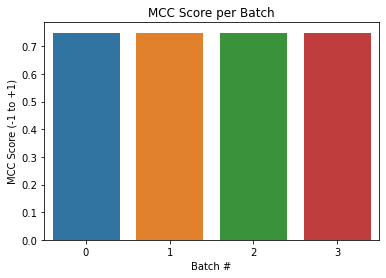

In [41]:
from sklearn.metrics import matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns

matthews_set = []

# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')

# For each input batch...
for i in range(len(true_labels)):
    # The predictions for this batch are a 2-column ndarray (one column for "0"
    # and one column for "1"). Pick the label with the highest value and turn this
    # in to a list of 0s and 1s.
    pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
    # Calculate and store the coef for this batch.
    matthews = matthews_corrcoef(true_labels[i], pred_labels_i)
    matthews_set.append(matthews)
    
# Create a barplot showing the MCC score for each batch of test samples.
ax = sns.barplot(x=list(range(len(matthews_set))), y=matthews_set, ci=None)

plt.title('MCC Score per Batch')
plt.ylabel('MCC Score (-1 to +1)')
plt.xlabel('Batch #')

plt.show()

In [42]:
# Import and evaluate each test batch using Matthew's correlation coefficient
from sklearn.metrics import matthews_corrcoef
matthews_set = []
for i in range(len(true_labels)):
  matthews = matthews_corrcoef(true_labels[i],
                 np.argmax(predictions[i], axis=1).flatten())
  matthews_set.append(matthews)
  
# Flatten the predictions and true values for aggregate Matthew's evaluation on the whole dataset
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()
flat_true_labels = [item for sublist in true_labels for item in sublist]

print('Classification accuracy using BERT Fine Tuning: {0:0.2%}'.format(matthews_corrcoef(flat_true_labels, flat_predictions)))


Classification accuracy using BERT Fine Tuning: 74.92%


<a id="subsection-3.5"></a>
## Prediction with BERT Model

In [25]:

print('Starting Prediction.')
# Put model in evaluation mode:

model.eval()

# Tracking variables :

predictions = []

# Predict:

for batch in BERT_Predict_Loader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask = batch
    with torch.no_grad():
        outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    predictions.append(logits)

print('DONE.')

Starting Prediction.
DONE.


In [26]:
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()
submission = pd.read_csv('../input/nlp-getting-started/sample_submission.csv')
submission['target'] = flat_predictions
submission.head(10)

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
5,12,1
6,21,0
7,22,0
8,27,0
9,29,0


In [45]:
Grouped_Disaster = submission.groupby(['target'])['id'].count().reset_index()
labels = ['Disaster','Non-Disaster']


# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=Grouped_Disaster['id'], hole=.4)])
fig.update_layout(width=600, height=400,title_text='BERT- Predicted Disaster Tweet Percentage',
                 annotations=[dict(text='#tweet', x=0.5, y=0.5, font_size=20, showarrow=False)])
plotly.offline.iplot(fig)

**Save the submission**

In [28]:
submission.to_csv("submission.csv", index=False, header=True)

<a id="subsection-4.7"></a>
## BERT Confusion Matrix

Reference - https://www.kaggle.com/marcovasquez/basic-nlp-with-tensorflow-and-wordcloud**

In [47]:
print('Starting Prediction.')
# Put model in evaluation mode:

model.eval()

# Tracking variables :

predictions = []

# Predict:

for batch in BERT_Train_Loader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch
    with torch.no_grad():
        outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    predictions.append(logits)

print('DONE.')

Starting Prediction.
DONE.


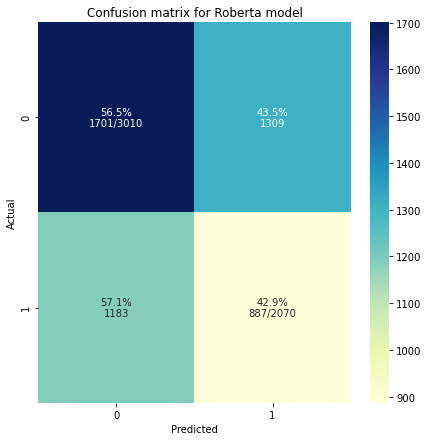

In [48]:
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
def plot_cm(y_true, y_pred, title, figsize=(5,5)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    
plot_cm(flat_predictions, TrainDataSet['target'].values, 'Confusion matrix for Roberta model', figsize=(7,7))

<a id="section-eight"></a>
# RoBERTa model with Tensorflow and HuggingFace
Robustly optimised BERT is an optimised method for pretraining NLP systems, built on BERT’s language-masking strategy. The model is claimed to have surpassed the BERT-large as well as XLNet-large models in performance.

**RoBERTa performs better than BERT By**

* Bigger training data.

* Using dynamic masking pattern.

* Replacing the next sentence prediction training objective.

* Training on longer sequences.

In [12]:
import tensorflow as tf
import numpy as np
from transformers import TFRobertaModel, RobertaTokenizer, TFRobertaForSequenceClassification
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

<a id="subsection-4.1"></a>
### ***RoBERTa - Create Tokenizer**

BERT:       [CLS] + tokens + [SEP] + padding


RoBERTa:    [CLS] + prefix_space + tokens + [SEP] + padding

In [13]:
Roberta_Tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
Disastweets = pd.concat([TrainDataSet, TestDataSet])
Disastweets = Disastweets.text.values

print('Tokenized: ', Roberta_Tokenizer.tokenize(Disastweets[0]))
print('Token IDs: ', Roberta_Tokenizer.convert_tokens_to_ids(Roberta_Tokenizer.tokenize(Disastweets[0])))


Tokenized:  ['Our', 'ĠDe', 'eds', 'Ġ', 'Ġ', 'ĠReason', 'Ġ', 'Ġ', 'Ġearthquake', 'ĠMay', 'ĠALL', 'AH', 'ĠFor', 'give', 'Ġus']
Token IDs:  [2522, 926, 12080, 1437, 1437, 31613, 1437, 1437, 8969, 392, 12389, 15334, 286, 26650, 201]


In [14]:
max_len = 0

# For every sentence...
for text in Disastweets:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = Roberta_Tokenizer.tokenize(text,is_pretokenized=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  58


<a id="subsection-4.2"></a>
### * ** RoBERTa - MapToken**

In [15]:
# Thanks to https://www.kaggle.com/xhlulu/disaster-nlp-keras-bert-using-tfhub
def MapTokens(texts):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = Roberta_Tokenizer.tokenize(text,is_pretokenized=True)
        CLS = Roberta_Tokenizer.cls_token
        SEP = Roberta_Tokenizer.sep_token    
        text = text[:max_len-2]
        input_sequence = [CLS] + text + [SEP]
        pad_len = max_len - len(input_sequence)
        
        tokens = Roberta_Tokenizer.convert_tokens_to_ids(input_sequence)
        tokens += [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
    
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

In [16]:
train_input = MapTokens(TrainDataSet.text.values)
test_input = MapTokens(TestDataSet.text.values)
train_labels = TrainDataSet.target.values

<a id="subsection-4.3"></a>
## RoBERTa - Build Model

In [17]:
# Ref : https://github.com/huggingface/transformers/issues/1350
    
class _TFRobertaForSequenceClassification(TFRobertaForSequenceClassification):
    
    def __init__(self, config, *inputs, **kwargs):
        super(_TFRobertaForSequenceClassification, self).__init__(config, *inputs, **kwargs)
        self.roberta.call = tf.function(self.roberta.call)


# Load model and collect encodings
roberta = _TFRobertaForSequenceClassification.from_pretrained('roberta-large',num_labels=2)

#Optimizer
Roberta_Tweet_Optimizer = Adam(
                  lr = 6e-6, # args.learning_rate
                  epsilon = 1e-8 # args.adam_epsilon
                )
#Compile the Model
roberta.compile(optimizer=Roberta_Tweet_Optimizer, loss='binary_crossentropy', metrics=['accuracy'])
#roberta.get_layer('predictions').activation=tf.compat.v1.keras.activations.linear
roberta.summary()


Model: "private_tf_roberta_for_sequence_classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
roberta (TFRobertaMainLayer) multiple                  355359744 
_________________________________________________________________
classifier (TFRobertaClassif multiple                  1051650   
Total params: 356,411,394
Trainable params: 356,411,394
Non-trainable params: 0
_________________________________________________________________


In [18]:
Roberta_Tweet_Optimizer = Adam(
                  lr = 6e-6, # args.learning_rate
                  epsilon = 1e-8 # args.adam_epsilon
                )
roberta.compile(optimizer=Roberta_Tweet_Optimizer, loss='binary_crossentropy', metrics=['accuracy'])
#roberta.get_layer('predictions').activation=tf.compat.v1.keras.activations.linear
roberta.summary()


Model: "private_tf_roberta_for_sequence_classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
roberta (TFRobertaMainLayer) multiple                  355359744 
_________________________________________________________________
classifier (TFRobertaClassif multiple                  1051650   
Total params: 356,411,394
Trainable params: 356,411,394
Non-trainable params: 0
_________________________________________________________________


<a id="subsection-4.4"></a>
## RoBERTa - Fit Model

In [19]:
checkpoint = ModelCheckpoint('model_roberta.h5', monitor='val_loss', save_best_only=True)

train_history = roberta.fit(
    train_input, TrainDataSet['target'].values,
    validation_split = 0.2,
    epochs = 4, # recomended 3-5 epochs
    callbacks=[checkpoint],
    batch_size = 32
)

Epoch 1/4
191/191 [==============================] - 168s 881ms/step - loss: 1.9937 - accuracy: 0.4619 - val_loss: 0.6312 - val_accuracy: 0.4655
Epoch 2/4
191/191 [==============================] - 162s 849ms/step - loss: 0.9982 - accuracy: 0.4683 - val_loss: 0.4878 - val_accuracy: 0.5332
Epoch 3/4
191/191 [==============================] - 162s 848ms/step - loss: 0.5394 - accuracy: 0.4578 - val_loss: 0.4570 - val_accuracy: 0.4938
Epoch 4/4
191/191 [==============================] - 159s 832ms/step - loss: 0.6472 - accuracy: 0.4795 - val_loss: 0.7122 - val_accuracy: 0.4655


<a id="subsection-4.5"></a>
## RoBERTa - Predict Using Model

In [20]:
roberta.load_weights('model_roberta.h5')
test_pred_roberta = roberta.predict(test_input)
flat_predictions = [item for sublist in test_pred_roberta for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

<a id="subsection-4.6"></a>
## RoBERTa - Plot the Prediction

In [23]:
pred = pd.DataFrame(flat_predictions, columns=['target'])
#pred.plot.hist()

values = [len(pred.query("target == 1")), len(pred.query("target == 0"))]
labels = ['Disaster','Non-Disaster']


# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(width=600, height=400,title_text='RoBERTa - Predicted Disaster Tweet Percentage',
                 annotations=[dict(text='#tweet', x=0.5, y=0.5, font_size=20, showarrow=False)])
plotly.offline.iplot(fig)



## Create Prediction Dataset

In [24]:
TestPrediction = pd.read_csv('../input/nlp-getting-started/sample_submission.csv')
TestPrediction['target'] = flat_predictions
TestPrediction.head(10)


,target
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,0
9,0


<a id="subsection-4.7"></a>
## RoBERTa Confusion Matrix

Reference - https://www.kaggle.com/marcovasquez/basic-nlp-with-tensorflow-and-wordcloud**

* **Generate Prediction for training Data**
Use the training input data and create a prediction so we can compare with actual training data targets using the confusion matrix

In [25]:
train_pred_roberta = roberta.predict(train_input)

train_predictions = [item for sublist in train_pred_roberta for item in sublist]
train_predictions = np.argmax(train_predictions, axis=1).flatten()

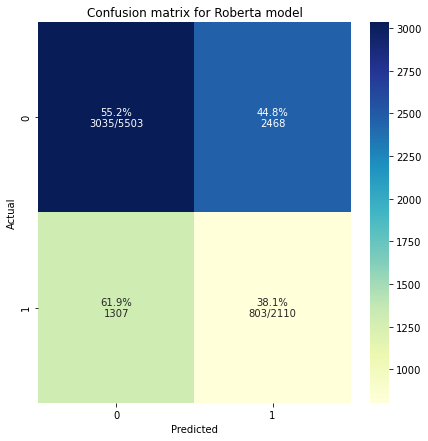

In [28]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
def plot_cm(y_true, y_pred, title, figsize=(5,5)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

plot_cm(train_predictions, TrainDataSet['target'].values, 'Confusion matrix for Roberta model', figsize=(7,7))


## Create the submission file

In [29]:
TestPrediction.to_csv("submission.csv", index=False, header=True)